# motion segmentation with spatial transform

## dataset
- FBMS-59-3Dmotion (only part of ground true) [FBMS-59-3Dmotion-Trainingset.zip](http://vis-www.cs.umass.edu/motionSegmentation/data/FBMS-59-3Dmotion-Trainingset.zip) [FBMS-59-3Dmotion-Testset.zip](http://vis-www.cs.umass.edu/motionSegmentation/data/FBMS-59-3Dmotion-Testset.zip)
- FBMS-59 (uncommon image format) [FBMS_Test.zip](https://lmb.informatik.uni-freiburg.de/resources/datasets/fbms/FBMS_Testset.zip) [FBMS_Trainingset.zip](https://lmb.informatik.uni-freiburg.de/resources/datasets/fbms/FBMS_Trainingset.zip)
- BMS-26 (uncommon image format) [moseg_dataset.zip](https://lmb.informatik.uni-freiburg.de/resources/datasets/moseg_dataset.zip)
- BMS (video format, not very good, unknown source)
- BMCnet 
- SegTrackv2
- DAVIS (not motion segmentation, but main motion object segmentation)
- CamouflagedAnimalDataset (not spatial transform) [CamouflagedAnimalDataset.zip](http://vis-www.cs.umass.edu/motionSegmentation/data/CamouflagedAnimalDataset.zip)
- complexBackground-multilabel (not spatial transform) [complexBackground-multilabel.zip](http://vis-www.cs.umass.edu/motionSegmentation/data/complexBackground-multilabel.zip)
- changedetection2012/2014 (not spatial transform)

In [1]:
import sys
sys.path.insert(0,os.path.expanduser('~/git/torchseg'))
print(sys.path)

import os
os.chdir(os.path.expanduser('~/git/torchseg'))
from utils.augmentor import get_default_augmentor_config, Augmentations
from utils.disc_tools import show_images
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
from models.motionseg.motion_utils import get_dataset
def show_images(images,titles=None,vmin=None,vmax=None,col_num=2,figsize=(7, 6)):
    fig, axes = plt.subplots((len(images)+1)//col_num ,col_num , figsize=figsize, sharex=True, sharey=True)
    ax = axes.ravel()

    for i in range(len(images)):
        ax[i].imshow(images[i],vmin=vmin,vmax=vmax)
        if titles is None:
            ax[i].set_title("image %d"%i)
        else:
            ax[i].set_title(titles[i])

    plt.show()

['/home/yzbx/git/torchseg', '/home/yzbx/git/torchseg/notebooks', '/home/yzbx/git/gnu/models/research', '/home/yzbx/git/gnu/models/research/slim', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python36.zip', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/lib-dynload', '', '/home/yzbx/.local/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/kiwisolver-1.1.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/home/yzbx/git/gnu/distiller', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/tqdm-4.41.1-py3.6.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/davis2017-0.1.0-py3.6.egg', '/home

(1024, 2048, 3) (1024, 2048)
(448, 897, 3) (448, 897)


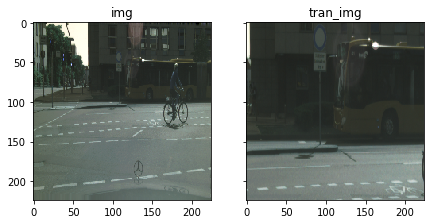

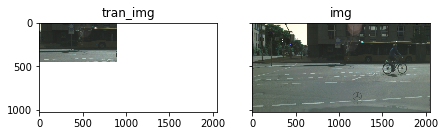

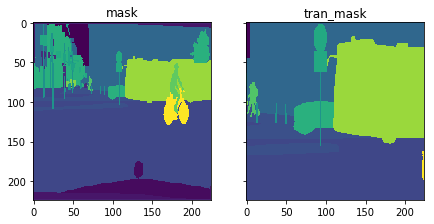

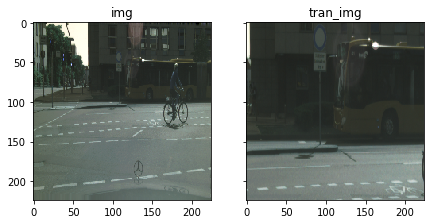

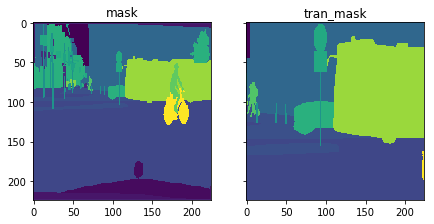

In [36]:
config = get_default_augmentor_config()
config.aug.keep_crop_ratio=False
config.aug.use_rotate=False
config.aug.min_crop_size=[400,800]
config.aug.max_crop_size=[500,1000]
config.aug.crop_size_step=0
config.aug.pad_for_crop=True
config.aug.use_debug=True
config.aug.horizontal_flip=False
config.dataset=edict()
config.dataset.ignore_index=255
aug = Augmentations(config)
img = cv2.imread('test/image.png', cv2.IMREAD_COLOR)
mask = cv2.imread('test/mask.png', cv2.IMREAD_GRAYSCALE)
#    img=np.random.rand(60,80)
#    mask=np.random.rand(60,80)

assert img is not None
assert mask is not None

tran_img, tran_mask = aug.transform(img, mask)
assert tran_img is not None
assert tran_mask is not None
print(img.shape,mask.shape)
print(tran_img.shape,tran_mask.shape)

imgs = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR) for img in [img, tran_img]]
masks = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST) for img in [mask, tran_mask]]
show_images(imgs, ['img', 'tran_img'])
show_images([tran_img,img],['tran_img','img'])
show_images(masks, ['mask','tran_mask'], vmin=0,vmax=33)

imgs = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR) for img in [img, tran_img]]
masks = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST) for img in [mask, tran_mask]]
show_images(imgs, ['img', 'tran_img'])
show_images(masks, ['mask','tran_mask'])

# optical flow 

train size = 58853
total dataset image 58853, use 1015
{'highway', 'busyBoulvard', 'skating', 'boulevard', 'lakeSide', 'bridgeEntry', 'turbulence1', 'canoe', 'streetCornerAtNight', 'backdoor', 'boats', 'fountain01', 'streetLight', 'port_0_17fps', 'fall', 'continuousPan', 'parking', 'busStation', 'PETS2006', 'tramCrossroad_1fps', 'badminton', 'corridor', 'blizzard', 'intermittentPan', 'bungalows', 'turbulence0', 'copyMachine', 'fluidHighway', 'abandonedBox', 'sofa', 'diningRoom'} set()


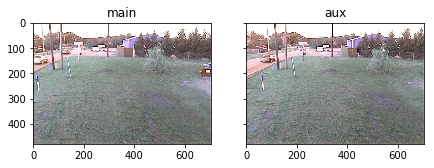

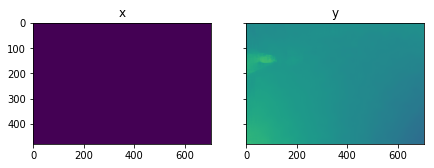

vmax=7.680344581604004,vmin=-59.94051742553711
val size = 32796
total dataset image 32796, use 1025
set() {'tramStation', 'pedestrians', 'library', 'twoPositionPTZCam', 'turbulence2', 'traffic', 'park', 'peopleInShade', 'turnpike_0_5fps', 'winterStreet', 'tramstop', 'turbulence3', 'cubicle', 'fountain02', 'office', 'tunnelExit_0_35fps', 'snowFall', 'wetSnow', 'winterDriveway', 'overpass', 'zoomInZoomOut', 'sidewalk'}


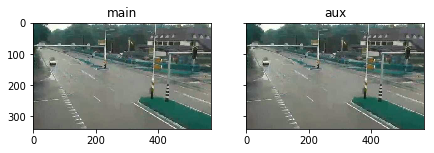

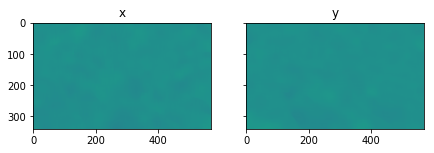

vmax=1.8590577840805054,vmin=-1.8620967864990234


In [44]:
# view optical flow
def show_optical_flow(main_path,aux_path,out_path):
    main_img=cv2.imread(main_path)
    aux_img=cv2.imread(aux_path)
    show_images([main_img,aux_img],['main','aux'])
    flow_file=open(out_path,'r')

    a=np.fromfile(flow_file,np.uint8,count=4)
    b=np.fromfile(flow_file,np.int32,count=2)
    flow=np.fromfile(flow_file,np.float32).reshape((b[1],b[0],2))
    show_images([flow[:,:,0],flow[:,:,1]],['x','y'],vmax=20,vmin=-20)
    print('vmax={},vmin={}'.format(np.max(flow),np.min(flow)))
    flow_file.close()

config=edict()
config.dataset='cdnet2014'
assert config.dataset in ['cdnet2014','FBMS','segtrackv2','BMCnet']
config.frame_gap=5
config.input_shape=[224,224]
config.use_part_number=1000
config.ignore_outOfRoi=True

#path to save optical flow results
flow_root_dir=os.path.expanduser('~/cvdataset/optical_flow')
# root path for all dataset
dataset_root_dir=os.path.expanduser('~/cvdataset')

for split in ['train','val']:
    xxx_dataset=get_dataset(config,split)
    n=len(xxx_dataset)
    for idx in range(n):
        main_path,aux_path,gt_path=xxx_dataset.__get_path__(idx)
        assert main_path.find(dataset_root_dir)>=0,'suppose is wrong for {} and {} !!! cannot generate out_path'.format(main_path,dataset_root_dir)
        out_path=main_path.replace(dataset_root_dir,flow_root_dir)
        suffix=os.path.splitext(out_path)[1]
        out_path=out_path.replace(suffix,'.flo')
        
        show_optical_flow(main_path,aux_path,out_path)
        break

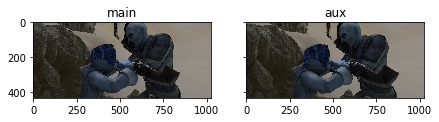

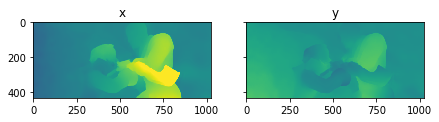

vmax=36.184730529785156,vmin=-7.337772846221924


In [45]:
main_path=os.path.expanduser('~/git/gnu/pytorch-liteflownet/images/first.png')
aux_path=os.path.expanduser('~/git/gnu/pytorch-liteflownet/images/second.png')
out_path=os.path.expanduser('~/git/gnu/pytorch-liteflownet/out.flo')
show_optical_flow(main_path,aux_path,out_path)

# SegTrackv2 dataset

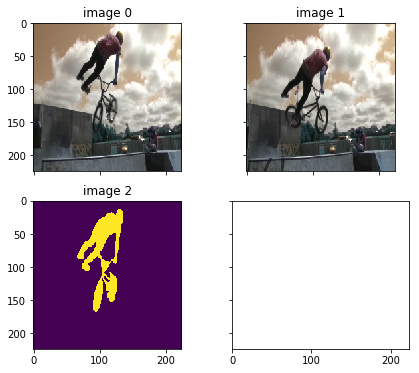

627


In [37]:
from easydict import EasyDict as edict
from dataset.segtrackv2_dataset import segtrackv2_dataset as td

config=edict()
config.input_shape=(224,224)
config.root_path=os.path.expanduser('~/cvdataset/SegTrackv2')
config.frame_gap=5
config.use_optical_flow=False

dataset=td(config,split='train')
N=len(dataset)
idx=np.random.randint(N)
imgs,gts=dataset.__getitem__(idx)
imgs=[img.transpose((1,2,0)) for img in imgs]
if isinstance(gts,(tuple,list)):
    gts=[gt.squeeze() for gt in gts]
else:
    gts=[gts.squeeze()]
show_images(imgs+gts)

# BMCnet dataset

dataset size = {} 14991
total dataset image 14991, use 1071


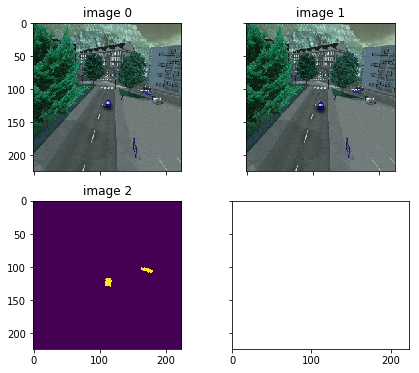

In [35]:
from easydict import EasyDict as edict
from dataset.bmcnet_dataset import bmcnet_dataset as td

config=edict()
config.input_shape=(224,224)
config.root_path=os.path.expanduser('~/cvdataset/BMCnet')
config.frame_gap=5
config.use_optical_flow=False
config.use_part_number=1000

dataset=td(config,split='train')
N=len(dataset)
idx=np.random.randint(N)
imgs,gts=dataset.__getitem__(idx)
imgs=[img.transpose((1,2,0)) for img in imgs]
if isinstance(gts,(tuple,list)):
    gts=[gt.squeeze() for gt in gts]
else:
    gts=[gts.squeeze()]
show_images(imgs+gts)

# FBMS dataaset 
- instance level segmentation labeled, but not semantic segmentation labeled.
- only part of frame is labeled.

In [10]:
from easydict import EasyDict as edict
from dataset.fbms_dataset import fbms_dataset as td 
from utils.survey import dataset_survey
from PIL import Image

config=edict()
config.input_shape=(224,224)
# config.train_path=os.path.expanduser('~/cvdataset/FBMS/Trainingset')
# config.val_path=os.path.expanduser('~/cvdataset/FBMS/Testset')
config.root_path=os.path.expanduser('~/cvdataset/FBMS')
config.frame_gap=5
config.use_optical_flow=False
config.use_part_number=1000

dataset=td(config,split='train')
N=len(dataset)
idx=np.random.randint(N)
data=dataset.__getitem__(idx)
imgs=data['images']
gts=data['labels']
main_file=data['main_path']
aux_file=data['aux_path']
gt_file=data['gt_path']

imgs=[img.transpose((1,2,0)) for img in imgs]
if isinstance(gts,(tuple,list)):
    gts=[gt.squeeze() for gt in gts]
else:
    gts=[gts.squeeze()]
show_images(imgs+gts)
print(main_file,aux_file,gt_file)

size_set=set()
pixel_set=set()
show_gts=[]
show_imgs=[]
titles=[]

data_survey=dataset_survey(256)
bad_path_list=[]
for split in ['train','val']:
    dataset=td(config,split=split)
    for idx in range(N):
        img1,img2,gt=dataset.__get_path__(idx)
        #gt_img=cv2.imread(gt)
        gt_img_pil=Image.open(gt)
        gt_img=np.array(gt_img_pil,dtype=np.uint8)
        if len(gt_img.shape)==3:
            bad_path_list.append((img1,gt))
        
        data_survey.update_survey(gt)
        size_set.add(gt_img.shape)
        n=len(pixel_set)
        gt_pixel_set=set(np.unique(gt_img))
        pixel_set=pixel_set.union(gt_pixel_set)
        if len(pixel_set)>n:
            show_gts.append(gt_img)
            show_imgs.append(cv2.imread(img1))
            titles.append(','.join([str(p) for p in gt_pixel_set]))
        
print('size_set','*'*30)
print(size_set)
print('pixel_set','*'*30)
print(pixel_set)
print('dataset survey','*'*30)
data_survey.summary()

# for img,gt,title in zip(show_imgs,show_gts,titles):
#     show_images([img,gt],[title,title])
    
# for img_path,gt_path in bad_path_list:
#     img=cv2.imread(img_path)
#     gt_img_pil=Image.open(gt_path)
#     gt_img=np.array(gt_img_pil,dtype=np.uint8)
#     cv_gt=cv2.imread(gt_path)
#     print(np.unique(gt_img[:,:,0]),np.unique(gt_img[:,:,1]),np.unique(cv_gt))
#     show_images([img,gt_img[:,:,0],gt_img[:,:,1],cv_gt])

train dataset size 353
augmente validataion dataset ******************************


KeyError: 'main_file'

In [ ]:
dataset_dict={}
loader_dict={}
for s in [224,256,288,320]:
    config.input_shape=[s,s]
    dataset_dict[s]=td(config,split='train')
    loader_dict[s]=torch.utils.data.DataLoader(dataset_dict[s],batch_size=4, shuffle=False)

for s in [224,256,288,320]:
    print(dataset_dict[s].input_shape)
    x=loader_dict[s].__iter__()
    print(type(x))

concat_dataset=torch.utils.data.ConcatDataset(dataset_dict.values())
N=len(concat_dataset)
idx=np.random.randint(N)
imgs,gts=concat_dataset.__getitem__(idx)
print(idx,N)
for img in imgs:
    print(img.shape)
print(gts.shape)

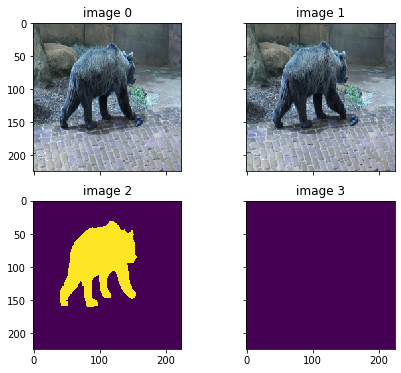

/home/yzbx/cvdataset/FBMS/Trainingset/bear02/bear02_0200.jpg /home/yzbx/cvdataset/FBMS/Trainingset/bear02/bear02_0195.jpg /home/yzbx/cvdataset/FBMS/Trainingset/bear02/GroundTruth/200_gt.png
2 2


In [12]:
idx=np.random.randint(N)
data=dataset.__getitem__(idx)
imgs=data['images']
gts=data['labels']
main_file=data['main_path']
aux_file=data['aux_path']
gt_file=data['gt_path']

imgs=[img.transpose((1,2,0)) for img in imgs]
if isinstance(gts,(tuple,list)):
    gts=[gt.squeeze() for gt in gts]
else:
    gts=[gts.squeeze()]
show_images(imgs+gts)
print(main_file,aux_file,gt_file)
print(len(imgs),len(gts))

# CDNet2014
- part of frame is labeled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train size = 58853
total dataset image 58853, use 1015
augmente validataion dataset ******************************


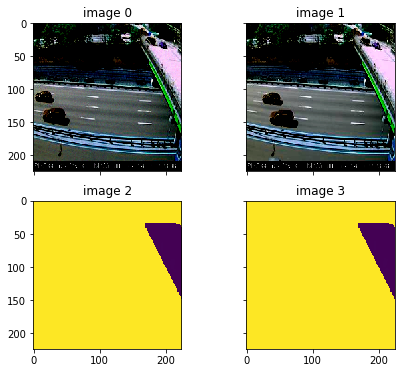

/home/yzbx/cvdataset/cdnet2014/intermittentObjectMotion/streetLight/input/in002412.jpg /home/yzbx/cvdataset/cdnet2014/intermittentObjectMotion/streetLight/input/in002407.jpg /home/yzbx/cvdataset/cdnet2014/intermittentObjectMotion/streetLight/groundtruth/gt002412.png
2 2


In [13]:
from utils.configs.motionseg_config import get_default_config
from models.motionseg.motion_utils import get_dataset
config=get_default_config()
config.dataset='cdnet2014'

dataset=get_dataset(config,split='train')
N=len(dataset)
idx=np.random.randint(N)
data=dataset.__getitem__(idx)
imgs=data['images']
gts=data['labels']
main_file=data['main_path']
aux_file=data['aux_path']
gt_file=data['gt_path']

imgs=[img.transpose((1,2,0)) for img in imgs]
if isinstance(gts,(tuple,list)):
    gts=[gt.squeeze() for gt in gts]
else:
    gts=[gts.squeeze()]
show_images(imgs+gts)
print(main_file,aux_file,gt_file)
print(len(imgs),len(gts))

train dataset size 353
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


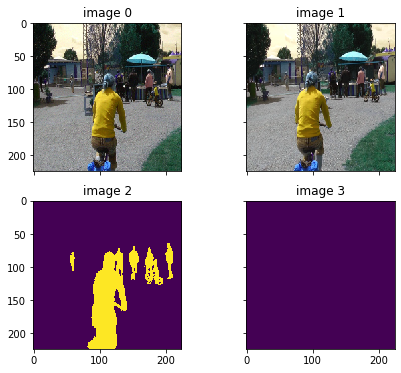

dataset=fbms, split=train******************************
/home/yzbx/cvdataset/FBMS/Trainingset/people05/people05_0200.jpg /home/yzbx/cvdataset/FBMS/Trainingset/people05/people05_0195.jpg /home/yzbx/cvdataset/FBMS/Trainingset/people05/GroundTruth/200_gt.png
img range in [0,255]
img range in [4,255]
gt range in [0 1]
gt range in [0]
val dataset size 367
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


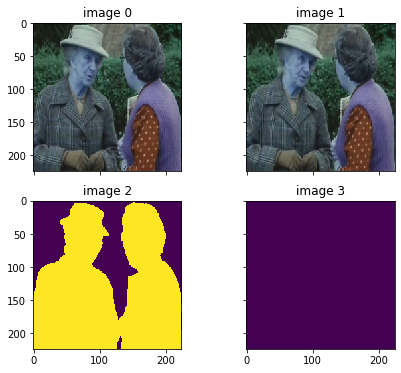

dataset=fbms, split=val******************************
/home/yzbx/cvdataset/FBMS/Testset/marple9/marple9_040.jpg /home/yzbx/cvdataset/FBMS/Testset/marple9/marple9_035.jpg /home/yzbx/cvdataset/FBMS/Testset/marple9/GroundTruth/040_gt.png
img range in [3,208]
img range in [3,210]
gt range in [0 1]
gt range in [0]
train size = 58853
total dataset image 58853, use 1015
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


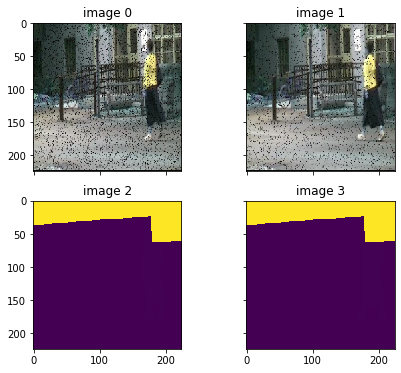

dataset=cdnet2014, split=train******************************
/home/yzbx/cvdataset/cdnet2014/shadow/backdoor/input/in001396.jpg /home/yzbx/cvdataset/cdnet2014/shadow/backdoor/input/in001391.jpg /home/yzbx/cvdataset/cdnet2014/shadow/backdoor/groundtruth/gt001396.png
img range in [0,255]
img range in [0,255]
gt range in [  0   1 255]
gt range in [  0   1 255]
val size = 32796
total dataset image 32796, use 1025
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


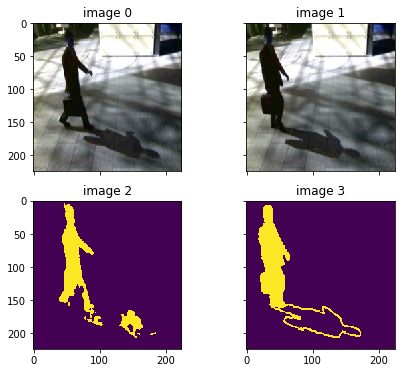

dataset=cdnet2014, split=val******************************
/home/yzbx/cvdataset/cdnet2014/shadow/peopleInShade/input/in000460.jpg /home/yzbx/cvdataset/cdnet2014/shadow/peopleInShade/input/in000455.jpg /home/yzbx/cvdataset/cdnet2014/shadow/peopleInShade/groundtruth/gt000460.png
img range in [0,255]
img range in [0,255]
gt range in [0 1]
gt range in [0 1]
dataset size = {} 627
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


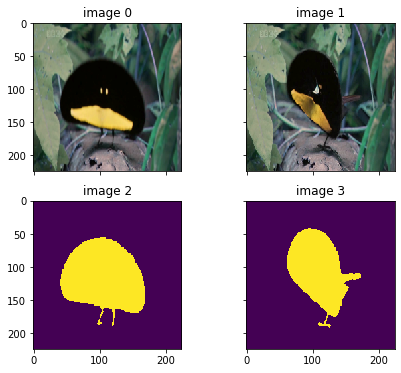

dataset=segtrackv2, split=train******************************
/home/yzbx/cvdataset/SegTrackv2/JPEGImages/bird_of_paradise/bird_of_paradise_00063.png /home/yzbx/cvdataset/SegTrackv2/JPEGImages/bird_of_paradise/bird_of_paradise_00069.png /home/yzbx/cvdataset/SegTrackv2/GroundTruth/bird_of_paradise/bird_of_paradise_00063.png
img range in [0,252]
img range in [0,250]
gt range in [0 1]
gt range in [0 1]
dataset size = {} 397
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


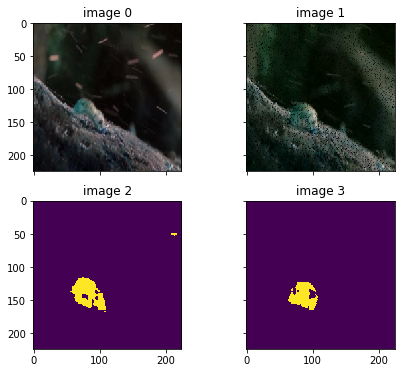

dataset=segtrackv2, split=val******************************
/home/yzbx/cvdataset/SegTrackv2/JPEGImages/worm/0000000093.png /home/yzbx/cvdataset/SegTrackv2/JPEGImages/worm/0000000099.png /home/yzbx/cvdataset/SegTrackv2/GroundTruth/worm/0000000093.png
img range in [0,240]
img range in [0,213]
gt range in [0 1]
gt range in [0 1]
dataset size = {} 14991
total dataset image 14991, use 1071
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


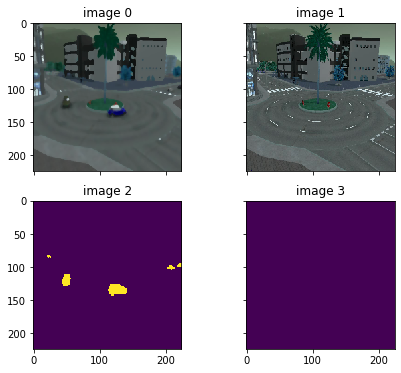

dataset=bmcnet, split=train******************************
/home/yzbx/cvdataset/BMCnet/train/121_png/input/1224.png /home/yzbx/cvdataset/BMCnet/train/121_png/input/123.png ['/home/yzbx/cvdataset/BMCnet/train/121_png/truth/1224.png', '/home/yzbx/cvdataset/BMCnet/train/121_png/truth/123.png']
img range in [0,239]
img range in [0,255]
gt range in [0 1]
gt range in [0]
dataset size = {} 990
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


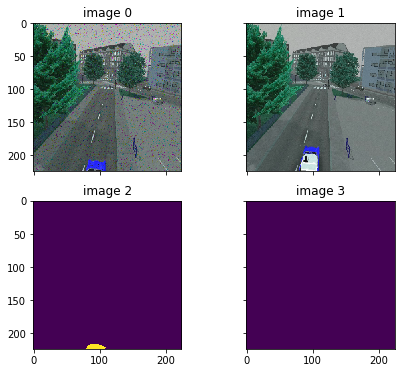

dataset=bmcnet, split=val******************************
/home/yzbx/cvdataset/BMCnet/test/412_png/input/1285.png /home/yzbx/cvdataset/BMCnet/test/412_png/input/1290.png ['/home/yzbx/cvdataset/BMCnet/test/412_png/private_truth/1285.png', '/home/yzbx/cvdataset/BMCnet/test/412_png/private_truth/1290.png']
img range in [0,255]
img range in [0,255]
gt range in [0 1]
gt range in [0]
train dataset size 2079
total dataset image 2079, use 1040
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


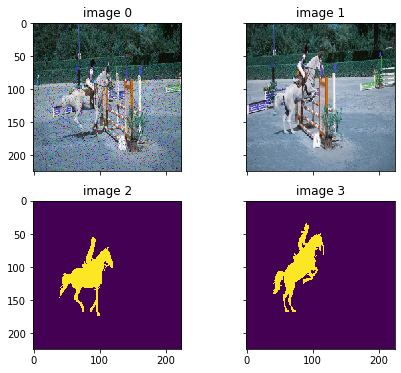

dataset=davis2016, split=train******************************
/home/yzbx/cvdataset/DAVIS/JPEGImages/480p/horsejump-low/00016.jpg /home/yzbx/cvdataset/DAVIS/JPEGImages/480p/horsejump-low/00021.jpg /home/yzbx/cvdataset/DAVIS/Annotations/480p/horsejump-low/00016.png
img range in [0,255]
img range in [0,255]
gt range in [0 1]
gt range in [0 1]
val dataset size 1376
total dataset image 1376, use 1376
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


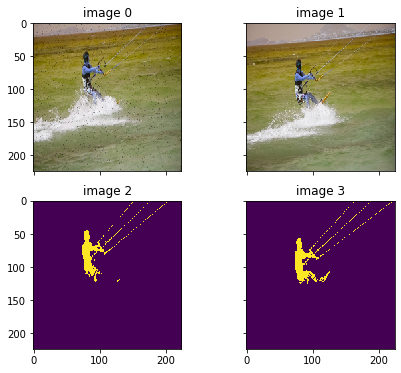

dataset=davis2016, split=val******************************
/home/yzbx/cvdataset/DAVIS/JPEGImages/480p/kite-surf/00004.jpg /home/yzbx/cvdataset/DAVIS/JPEGImages/480p/kite-surf/00009.jpg /home/yzbx/cvdataset/DAVIS/Annotations/480p/kite-surf/00004.png
img range in [0,249]
img range in [0,253]
gt range in [0 1]
gt range in [0 1]
train dataset size 4209
total dataset image 4209, use 1053
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


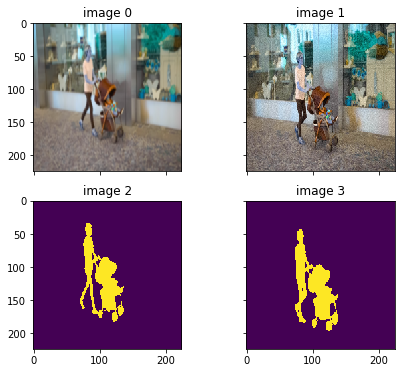

dataset=davis2017, split=train******************************
/home/yzbx/cvdataset/DAVIS/JPEGImages/480p/stroller/00029.jpg /home/yzbx/cvdataset/DAVIS/JPEGImages/480p/stroller/00034.jpg /home/yzbx/cvdataset/DAVIS/Annotations_unsupervised/480p/stroller/00029.png
img range in [0,255]
img range in [0,255]
gt range in [0 1]
gt range in [0 1]
val dataset size 1999
total dataset image 1999, use 1999
augmente validataion dataset ******************************
(224, 224, 3) (1, 224, 224)


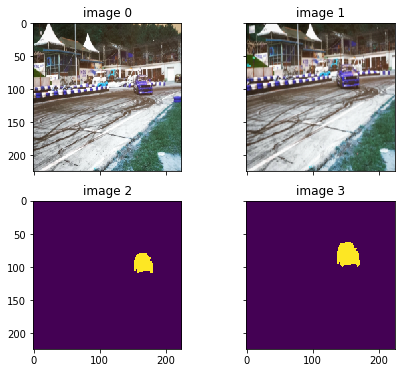

dataset=davis2017, split=val******************************
/home/yzbx/cvdataset/DAVIS/JPEGImages/480p/drift-straight/00003.jpg /home/yzbx/cvdataset/DAVIS/JPEGImages/480p/drift-straight/00008.jpg /home/yzbx/cvdataset/DAVIS/Annotations_unsupervised/480p/drift-straight/00003.png
img range in [8,255]
img range in [4,253]
gt range in [0 1]
gt range in [0 1]


In [2]:
from utils.configs.motionseg_config import get_default_config, dataset_root_dict
from dataset.dataset_generalize import image_normalizations
config=get_default_config()
keys=dataset_root_dict.keys()
normer=image_normalizations(ways='-1,1')
for key in keys:
    for split in ['train','val']:
        config.dataset=key
        d=get_dataset(config,split)
        N=len(d)
        idx=np.random.randint(N)
        data=d.__getitem__(idx)
        
        imgs=[img.transpose((1,2,0)) for img in data['images']]
        imgs=[normer.backward(img).astype(np.uint8) for img in imgs]
        gts=data['labels']

        print(imgs[0].shape, gts[0].shape)
        assert isinstance(gts,(list,tuple))
        gts=[gt.squeeze() for gt in gts]
        show_images(imgs+gts)
        print('dataset={}, split={}'.format(key,split) + '*'*30)
        print(data['main_path'],data['aux_path'],data['gt_path'])
        for img in imgs:
            print('img range in [{},{}]'.format(np.min(img),np.max(img)))
        
        for gt in gts:
            print('gt range in {}'.format(np.unique(gt)))
            

In [26]:
import cv2
img=cv2.imread('/home/yzbx/cvdataset/cdnet2014/cameraJitter/traffic/input/in001315.jpg')
print(np.min(img),np.max(img))

16 255
